In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer

In [3]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [4]:
df.dropna(inplace=True)

In [5]:
df.shape

(714, 3)

In [6]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [9]:
clf=DecisionTreeClassifier()

In [10]:
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [11]:
accuracy_score(y_test,y_pred)

0.6293706293706294

In [12]:
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

0.6303208137715179

In [13]:
kbin_age=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [14]:
trf=ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [15]:
x_train_trf=trf.fit_transform(x_train)
x_test_trf=trf.transform(x_test)

In [16]:
x_train_trf

array([[ 8.,  8.],
       [ 6.,  7.],
       [ 8.,  7.],
       ...,
       [11., 14.],
       [ 9.,  8.],
       [ 9.,  3.]])

In [17]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [18]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.    ,   7.25  ,   7.775 ,   7.8958,   8.1583,  10.5   ,
               13.    ,  14.4542,  18.75  ,  26.    ,  26.55  ,  31.275 ,
               51.4792,  76.2917, 108.9   , 512.3292])                   ],
      dtype=object)

In [19]:
output=pd.DataFrame({
    'age':x_train['Age'],
    'age_trf':x_train_trf[:,0],
    'fare':x_train['Fare'],
    'fare_trf':x_train_trf[:,1]
})

In [20]:
output['age_labels']=pd.cut(x=x_train['Age'],bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels']=pd.cut(x=x_train['Fare'],bins=trf.named_transformers_['second'].bin_edges_[0].tolist())


In [21]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
58,5.0,0.0,27.7500,10.0,"(0.42, 6.0]","(26.55, 31.275]"
386,1.0,0.0,46.9000,11.0,"(0.42, 6.0]","(31.275, 51.479]"
294,24.0,5.0,7.8958,3.0,"(23.0, 25.0]","(7.775, 7.896]"
624,21.0,4.0,16.1000,7.0,"(19.0, 21.0]","(14.454, 18.75]"
287,22.0,4.0,7.8958,3.0,"(21.0, 23.0]","(7.775, 7.896]"


In [22]:
clf=DecisionTreeClassifier()
clf.fit(x_train_trf,y_train)
y_pred=clf.predict(x_test_trf)
accuracy_score(y_test,y_pred)


0.6363636363636364

In [23]:
x_trf=trf.fit_transform(x)

np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

0.6317488262910798

In [24]:
def discretize(bins,strategy):
    kbin_age=KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare=KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    trf=ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    x_trf=trf.fit_transform(x)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title('before')
     
        
    plt.subplot(122)
    plt.hist(x_trf[:,0],color='red')
    plt.title('red')
    plt.show()

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x_train['Fare'])
    plt.title('fere_before')
    
    plt.subplot(122)
    plt.hist(x_trf[:,1],color='green')
    plt.title('fare_after')
    plt.show()

0.6358763693270736


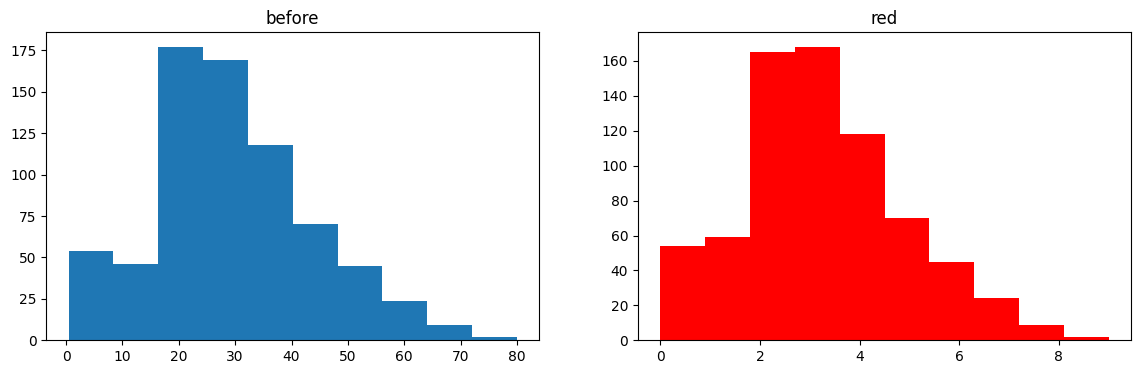

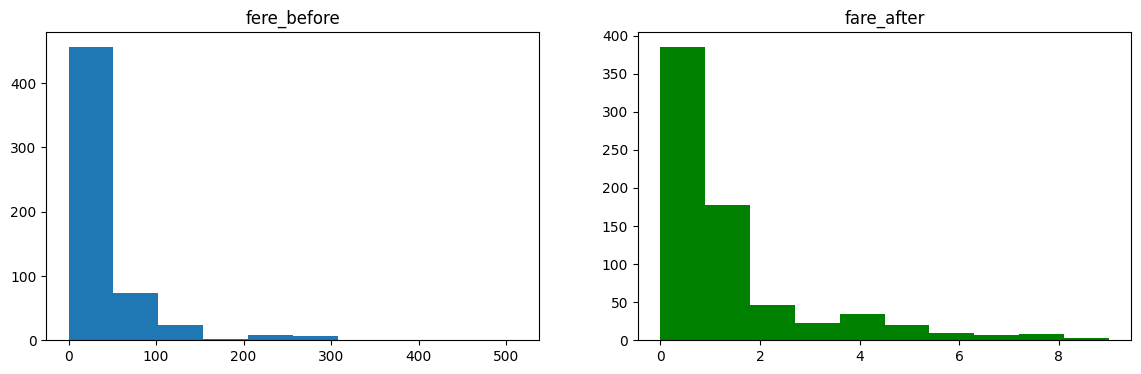

In [25]:
discretize(10,'kmeans')

# binarization


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer


In [28]:
df=pd.read_csv('train.csv')[['Age','Fare','SibSp','Parch','Survived']]


In [29]:
df.dropna(inplace=True)


In [30]:
df.head()

,Age,Fare,SibSp,Parch,Survived
0,22.0,7.2500,1,0,0
1,38.0,71.2833,1,0,1
2,26.0,7.9250,0,0,1
3,35.0,53.1000,1,0,1
4,35.0,8.0500,0,0,0


In [31]:
df['Family']=df['SibSp']+df['Parch']

In [32]:
df.head()

,Age,Fare,SibSp,Parch,Survived,Family
0,22.0,7.2500,1,0,0,1
1,38.0,71.2833,1,0,1,1
2,26.0,7.9250,0,0,1,0
3,35.0,53.1000,1,0,1,1
4,35.0,8.0500,0,0,0,0


In [33]:
df.drop(columns=['SibSp','Parch'],inplace=True)

In [34]:
df.head()

,Age,Fare,Survived,Family
0,22.0,7.2500,0,1
1,38.0,71.2833,1,1
2,26.0,7.9250,1,0
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [35]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [37]:
x_train.head()

,Age,Fare,Family
328,31.0,20.5250,2
73,26.0,14.4542,1
253,30.0,16.1000,1
719,33.0,7.7750,0
666,25.0,13.0000,0


In [44]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.6223776223776224

In [39]:
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

0.6555751173708919

In [40]:
from sklearn.preprocessing import Binarizer

In [41]:
trf=ColumnTransformer([
    ('bin',Binarizer(copy=False),['family'])
    
],remainder='passthrough')

In [42]:
x_train_trf=trf.fit_transform(x_train)
x_test_trf=trf.transform(x_test)

ValueError: A given column is not a column of the dataframe